[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


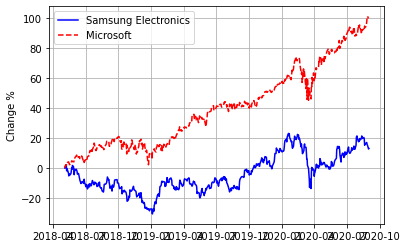

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

sec = pdr.get_data_yahoo('005930.KS', start='2018-05-04')
sec_dpc = (sec['Close']-sec['Close'].shift(1)) / sec['Close'].shift(1) * 100
sec_dpc.iloc[0] = 0
sec_dpc_cs = sec_dpc.cumsum()

msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')
msft_dpc = (msft['Close'] / msft['Close'].shift(1) -1) * 100
msft_dpc.iloc[0] = 0
msft_dpc_cs = msft_dpc.cumsum()

import matplotlib.pyplot as plt
plt.plot(sec.index, sec_dpc_cs, 'b', label='Samsung Electronics')
plt.plot(msft.index, msft_dpc_cs, 'r--', label='Microsoft')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()


MDD 최대 손실 낙폭은 특정기간에 발생한 최고점에서 최저머까지의
가장 큰 손실을 의미함.
이에 대해서 알아볼꺼임.

[*********************100%***********************]  1 of 1 completed


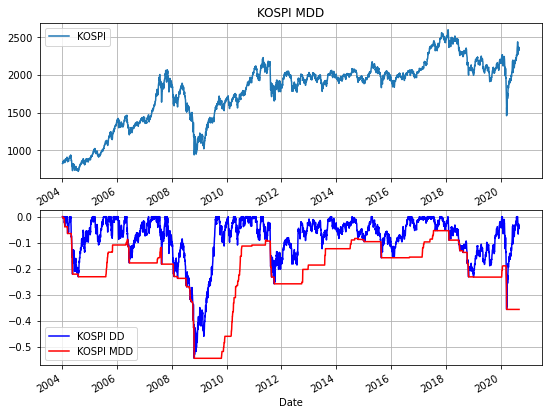

In [3]:
yf.pdr_override()

kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window = 252

peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close'] / peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9, 7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


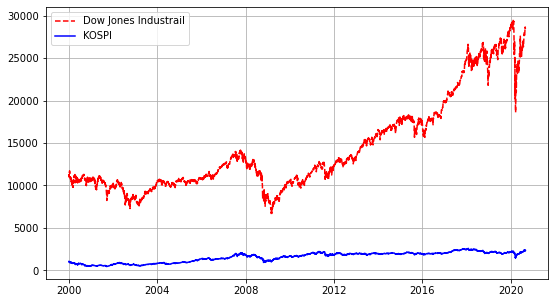

In [4]:
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

plt.figure(figsize=(9,5))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrail')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

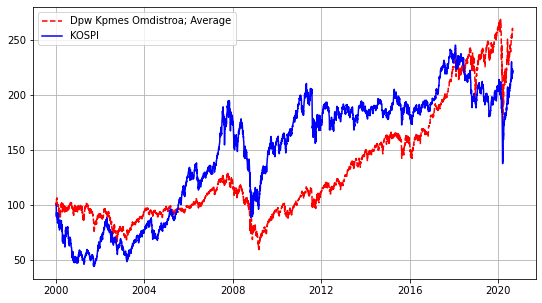

In [5]:
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r--', label='Dpw Kpmes Omdistroa; Average')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


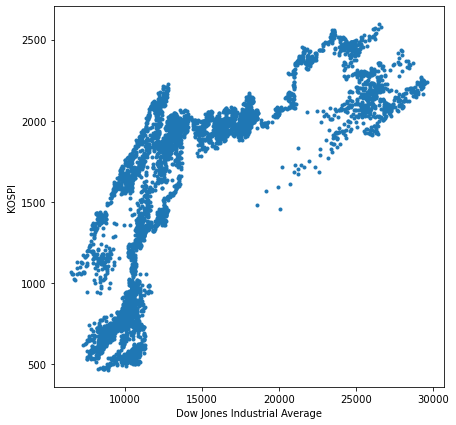

In [6]:
import pandas as pd

yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI' : kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

plt.figure(figsize=(7,7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [7]:
from scipy import stats
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.07822472456453325, intercept=440.96907540678285, rvalue=0.7463323616055964, pvalue=0.0, stderr=0.0009534746071136132)

In [8]:
df.corr()

DOW     KOSPI
DOW    1.000000  0.746332
KOSPI  0.746332  1.000000

In [9]:
df['DOW'].corr(df['KOSPI'])

0.7463323616055965

In [10]:
r_value = df['DOW'].corr(df['KOSPI'])
r_value

0.7463323616055965

In [11]:
r_squared = r_value ** 2
r_squared

0.5570119939797868

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


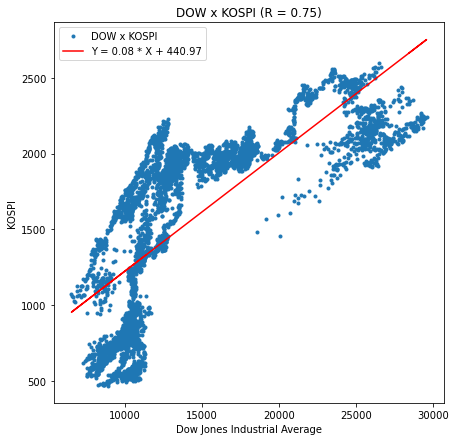

In [12]:
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kopsi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'X': dow['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


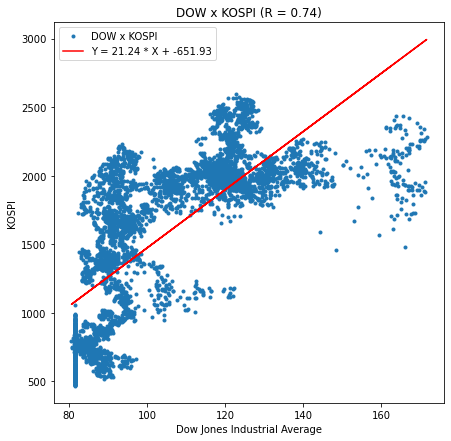

In [15]:
yf.pdr_override()

dow = pdr.get_data_yahoo('TLT', '2002-07-30')
kopsi = pdr.get_data_yahoo('^KS11', '2002-07-30')

df = pd.DataFrame({'X': dow['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.X, df.Y, '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()